In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 85)

# Logistic Regression: Scoring by Nested Cross-Validation

### Load the data

In [2]:
# Read Data from CSV (NEW DATA, NOT SCALED)
df = pd.read_csv("../data/abnormal_writeout_noscale.data.csv", index_col=0)

# trascurare da ACC a UVM
start_drop = df.columns.get_loc("ACC")
end_drop = df.columns.get_loc("UVM")
cols = np.arange(start_drop, end_drop + 1)
df.drop(df.columns[cols], axis=1, inplace=True)

# trascurare alcune colonne
df.drop("TTT_freq", axis=1, inplace=True)
df.drop("oldest_phylostratum_factor", axis=1, inplace=True)
df.drop("gc_cds", axis=1, inplace=True)

# Drop NaNs
df.dropna(inplace=True)

# Sort features
resp = df["response"]
occ = df["occ_total_sum"]
age = df["oldest_phylostratum"]
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)

# Collect Features and Labels
features_df = pd.DataFrame()
features_df["occ_total_sum"] = occ
features_df["oldest_phylostratum"] = age
features_df = pd.concat([features_df, conf], axis=1)

X = features_df.to_numpy()
y = df["response"].to_numpy()

features_df.head()

,occ_total_sum,oldest_phylostratum,cds_length,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
1,33,12.0,1488,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
10,28,1.0,873,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
100,36,1.0,1092,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
1000,126,1.0,2800,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
10000,55,1.0,1484,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.020604,0.009615,0.032280,0.023352,0.019918,0.012363,0.021978,0

***
### Custom PCA

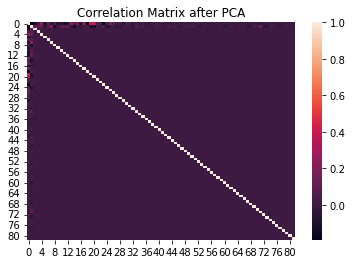

82 total features.
Confounder columns start from index 2 of feature matrix.
Non-counfounders: ['occ_total_sum', 'oldest_phylostratum']


,occ_total_sum,oldest_phylostratum,cds_length,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
1,33,12.0,1488,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
10,28,1.0,873,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
100,36,1.0,1092,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
1000,126,1.0,2800,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
10000,55,1.0,1484,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.020604,0.009615,0.032280,0.023352,0.019918,0.012363,0.021978,0

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Columns of confounder variables (highly colinear)
conf_index = 2
conf_cols = np.arange(2, X.shape[1])


class ConfounderPCA(BaseEstimator, TransformerMixin):
    """ 
    Custom PCA transformer for this dataset.
    Applies PCA only to the many collinear confounder 
    variables.
    
    cols - columns to which PCA will be applied.
    
    n_components - same as with the "vanilla" PCA. 
        If 0 < n_components < 1, select the number of 
        components such that the amount of variance that 
        needs to be explained is greater than the 
        percentage specified by n_components.
        
    apply_PCA - if false, simply returns the untransformed data.
    """

    def __init__(self, cols, n_components=None, apply_PCA=True):
        self.n_components = n_components
        self.apply_PCA = apply_PCA
        self.cols = cols
        if self.apply_PCA:
            self.pca = PCA(n_components=self.n_components)

    def fit(self, X, y=None):
        if self.apply_PCA:
            self.pca.fit(X[:, self.cols])
        return self

    def transform(self, X, y=None):
        if self.apply_PCA:
            X_pca = self.pca.transform(X[:, self.cols])
            return np.c_[X[:, :2], X_pca]
        else:
            return X


sns.heatmap(pd.DataFrame(ConfounderPCA(cols=np.arange(2, X.shape[1])).fit_transform(StandardScaler().fit_transform(X))).corr())
plt.title("Correlation Matrix after PCA")
plt.show()

print(X.shape[1], "total features.")
print("Confounder columns start from index", conf_index, "of feature matrix.")
print("Non-counfounders:", features_df.iloc[:, 0:conf_index].columns.tolist())

features_df

### Custom Scoring

In [4]:
from sklearn.metrics import auc, make_scorer, precision_recall_curve


def auprc(y_true, y_scores, **kwargs):
    """ Remember to use make_scorer(auprc, needs_proba=True,) """
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    # result is sum of the areas under each curve
    return auc(thresholds, precisions[:-1]) + auc(thresholds, recalls[:-1])

### Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (14536, 82) (14536,)
Testing set shape: (3634, 82) (3634,)


*** 
## Nested CV on Logistic Regression (Returning Information on the Best Parameter Configurations)

In this section: Nested CV (outer-fold=10, inner-fold=3). 

The outer cross-validation is defined by `KFold(n_splits=10)`, the inner by `KFold(n_splits=3)`. 

The nested cross-validation is performed as follows. Within each outer fold:
1. The data is split into training and testing. (9 folds for training, 1 for testing.)
2. A hyperparameter grid search is performed on the training set using 3-fold CV. The score for the best model, along with its parameters, are printed. 
3. This best model is scored on the reserved testing set. This outer-cv score is printed. 

### The Model and its Parameter Space

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define a parameter space to search
param_grid = {
    "lr__C": np.logspace(-3, 4, 7),
    "lr__class_weight": [None, "balanced"],
    "pca__apply_PCA": [True, False],
    "pca__n_components": [0.01, 0.5, 0.95, None],
}

# Define the model to be tuned
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", ConfounderPCA(cols=np.arange(2, X.shape[1]), n_components=0.95)),
    ("lr", LogisticRegression(max_iter=2000,)),
])

### Nested CV

In [11]:
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RepeatedKFold
from sklearn.utils._testing import ignore_warnings

# configure the cross-validation procedure
k_outer = 10
k_inner = 3
cv_outer = KFold(n_splits=k_outer, shuffle=True, random_state=1)
cv_inner = KFold(n_splits=k_inner, shuffle=True, random_state=3)

# To store results
roc_results = list()
# auprc_results = list()
# prec_results = list()
# rec_results = list()
# f1_results = list()
found_params = list()

print(f"Performing nested-cv with {k_outer} outer-folds and {k_inner} inner-folds.\n")
print("OUTER CV | BEST OF INNER CV | CHOSEN PARAMS")

for train_ix, test_ix in cv_outer.split(X_train):

    # split data
    X_tr, X_te = X_train[train_ix, :], X_train[test_ix, :]
    y_tr, y_te = y_train[train_ix], y_train[test_ix]

    # If some parameter combinations are incompatible:
    # with ignore_warnings(category=[ConvergenceWarning, FitFailedWarning]):
    
    # define search
    search = GridSearchCV(estimator=lr_clf, param_grid=param_grid, scoring="roc_auc", cv=cv_inner, n_jobs=-1)
    # execute search
    result = search.fit(X_tr, y_tr)
        
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_

    # evaluate model on the hold out dataset
    # yhat = best_model.predict(X_te)
    yhat = best_model.predict_log_proba(X_te)[:,1]

    # evaluate the model
    roc_auc = roc_auc_score(y_te, yhat)
    
    # store the result
    roc_results.append(roc_auc)
    # auprc_results.append(auprc(y_te, yhat))
    # prec_results.append(precision_score(y_te, yhat))
    # rec_results.append(recall_score(y_te, yhat))
    # f1_results.append(f1_score(y_te, yhat))
    found_params.append(result.best_params_)

    # report progress
    print(">roc-auc=%.3f, est=%.3f, params=%s" % (roc_auc, result.best_score_, result.best_params_))

# summarize the estimated performance of the model
print("ROC-AUC: %.3f (std = %.3f)" % (np.mean(roc_results), np.std(roc_results)))

Performing nested-cv with 10 outer-folds and 3 inner-folds.

OUTER CV | BEST OF INNER CV | CHOSEN PARAMS
>roc-auc=0.676, est=0.666, params={'lr__C': 0.21544346900318845, 'lr__class_weight': 'balanced', 'pca__apply_PCA': False, 'pca__n_components': 0.01}
>roc-auc=0.685, est=0.661, params={'lr__C': 3.1622776601683795, 'lr__class_weight': 'balanced', 'pca__apply_PCA': False, 'pca__n_components': 0.01}
>roc-auc=0.664, est=0.665, params={'lr__C': 3.1622776601683795, 'lr__class_weight': 'balanced', 'pca__apply_PCA': False, 'pca__n_components': 0.01}
>roc-auc=0.633, est=0.670, params={'lr__C': 3.1622776601683795, 'lr__class_weight': 'balanced', 'pca__apply_PCA': False, 'pca__n_components': 0.01}
>roc-auc=0.651, est=0.669, params={'lr__C': 3.1622776601683795, 'lr__class_weight': 'balanced', 'pca__apply_PCA': False, 'pca__n_components': 0.01}
>roc-auc=0.660, est=0.666, params={'lr__C': 0.21544346900318845, 'lr__class_weight': 'balanced', 'pca__apply_PCA': False, 'pca__n_components': 0.01}
>roc-

In [12]:
ncv_df = pd.DataFrame(roc_results, columns=['roc_auc'])
ncv_df = pd.concat([ncv_df, pd.DataFrame(found_params)], axis=1)
ncv_df

,roc_auc,lr__C,lr__class_weight,pca__apply_PCA,pca__n_components
0,0.676403,0.215443,balanced,False,0.01
1,0.685484,3.162278,balanced,False,0.01
2,0.664334,3.162278,balanced,False,0.01
3,0.633290,3.162278,balanced,False,0.01
4,0.650848,3.162278,balanced,False,0.01
5,0.660139,0.215443,balanced,False,0.01
6,0.677045,3.162278,balanced,False,0.01
7,0.697061,3.162278,balanced,False,0.01
8,0.687063,3.162278,balanced,False,0.01
9,0.675519,681.292069,balanced,False,0.01


In [11]:
ncv_df["roc_auc"].mean()

0.670698718678581

In [12]:
ncv_df.to_csv("./data/lr_ncv.csv")

# Model Scoring on Test Set

In [13]:
# Define the grid search object
gscv = GridSearchCV(
    estimator=lr_clf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring="roc_auc", 
)

# Search
gscv_result = gscv.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


In [14]:
gs_data = pd.DataFrame(gscv_result.cv_results_)
gs_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__class_weight,param_pca__apply_PCA,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.149906,0.006806,0.016739,0.002835,0.001,None,True,"{'lr__C': 0.001, 'lr__class_weight': None, 'pc...",0.660686,0.668552,0.651943,0.660394,0.006783,13
1,0.070722,0.009723,0.005410,0.002393,0.001,None,False,"{'lr__C': 0.001, 'lr__class_weight': None, 'pc...",0.663394,0.668412,0.653080,0.661629,0.006383,10
2,0.146503,0.005166,0.010696,0.002205,0.001,balanced,True,"{'lr__C': 0.001, 'lr__class_weight': 'balanced...",0.659812,0.668953,0.651852,0.660206,0.006987,15
3,0.062046,0.014394,0.004901,0.002195,0.001,balanced,False,"{'lr__C': 0.001, 'lr__class_weight': 'balanced...",0.662512,0.668845,0.653121,0.661492,0.006460,11
4,0.138293,0.012575,0.012310,0.002254,0.014678,None,True,"{'lr__C': 0.014677992676220698, 'lr__class_wei...",0.658085,0.665893,0.648599,0.657526,0.007071,23


In [15]:
gs_data.groupby(by='param_pca__apply_PCA').mean()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__apply_PCA,,,,,,,,,,
False,0.566410,0.076559,0.005560,0.001950,0.664371,0.669740,0.652929,0.662347,0.007035,7.714286
True,0.159415,0.010963,0.014454,0.003591,0.658409,0.666332,0.648980,0.657907,0.007097,21.285714


In [16]:
model = gscv_result.best_estimator_
print("Best Params:")
print(gscv_result.best_params_)
model.fit(X_train, y_train)

Best Params:
{'lr__C': 3.1622776601683795, 'lr__class_weight': 'balanced', 'pca__apply_PCA': False}


Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ConfounderPCA(apply_PCA=False,
                               cols=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
                               n_components=0.95)),
                ('lr',
                 LogisticRegression(C=3.1622776601683795,
                                    class_weight='balanced', max_iter=2000))])

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_test, y_test, cv=3, scoring='roc_auc')

array([0.6267053 , 0.6535989 , 0.64860904])